In [1]:
# prompt: load the UTM.csv and describe the column size, datatype and check for any missing values

import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('wild_scenario_bi_flow_features.csv')

# Describe the column size, data type, and check for missing values
print(df.info())

# Alternatively, you can check for missing values more specifically
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1180 non-null   int64  
 1   ul_total_num_pkts   1180 non-null   int64  
 2   ul_total_num_bytes  1180 non-null   float64
 3   ul_min_pkt_size     1180 non-null   float64
 4   ul_max_pkt_size     1180 non-null   float64
 5   ul_mean_pkt_size    1180 non-null   float64
 6   ul_std_pkt_size     803 non-null    float64
 7   ul_min_iat          803 non-null    float64
 8   ul_max_iat          803 non-null    float64
 9   ul_mean_iat         803 non-null    float64
 10  ul_std_iat          786 non-null    float64
 11  ul_dur              1180 non-null   float64
 12  dl_total_num_pkts   1180 non-null   int64  
 13  dl_total_num_bytes  1180 non-null   float64
 14  dl_min_pkt_size     1180 non-null   float64
 15  dl_max_pkt_size     1180 non-null   float64
 16  dl_mea

In [2]:
row_counts = df.groupby('app')['app'].count()

# Print the row counts for each app
print("\nRow Counts by App:")
row_counts


Row Counts by App:


app
facebook         45
gmail            37
google-drive    157
google-maps      64
hangout         131
hulu            212
instagram        56
messenger        42
netflix          59
pinterest        62
reddit           72
spotify         112
twitter          45
youtube          86
Name: app, dtype: int64

In [5]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
    # Replace NaN values with the mean of the column
    df[column].fillna(df[column].mean(), inplace=True)

    # Replace negative values with 0
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)

print("\nDataFrame after preprocessing:")
print(df.head())



DataFrame after preprocessing:
   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                64.0             64.0   
2           2                  1                64.0             64.0   
3           3                  1                64.0             64.0   
4           4                  1                66.0             66.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0              76.0       202.070525    0.861388   37.224391   
1             64.0              64.0       202.070525    0.861388   37.224391   
2             64.0              64.0       202.070525    0.861388   37.224391   
3             64.0              64.0       202.070525    0.861388   37.224391   
4             66.0              66.0       202.070525    0.861388   37.224391   

   ul_mean_iat  ...  dl_mean_iat  dl_std_i

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\568317322.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
ul_total_num_pkts     0
ul_total_num_bytes    0
ul_min_pkt_size       0
ul_max_pkt_size       0
ul_mean_pkt_size      0
ul_std_pkt_size       0
ul_min_iat            0
ul_max_iat            0
ul_mean_iat           0
ul_std_iat            0
ul_dur                0
dl_total_num_pkts     0
dl_total_num_bytes    0
dl_min_pkt_size       0
dl_max_pkt_size       0
dl_mean_pkt_size      0
dl_std_pkt_size       0
dl_min_iat            0
dl_max_iat            0
dl_mean_iat           0
dl_std_iat            0
dl_dur                0
ip_A                  0
port_A                0
ip_B                  0
port_B                0
protocal              0
action                0
app                   0
dtype: int64


In [7]:
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

# Print the list of non-numeric columns
print("Columns that are not int or float:")
print(list(non_numeric_columns))

Columns that are not int or float:
['ip_A', 'ip_B', 'protocal', 'action', 'app']


In [9]:
import ipaddress
def ip_to_decimal(ip_str):
  """Converts an IP address string to its decimal representation."""
  try:
    ip = ipaddress.ip_address(ip_str)
    return int(ip)
  except ValueError:
    return None  # Handle invalid IP addresses

# Apply the conversion to 'ip_A' and 'ip_B' columns
for column in ['ip_A', 'ip_B']:
  if column in df.columns:
    df[column] = df[column].apply(ip_to_decimal)

print(df.head())

   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                64.0             64.0   
2           2                  1                64.0             64.0   
3           3                  1                64.0             64.0   
4           4                  1                66.0             66.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0              76.0       202.070525    0.861388   37.224391   
1             64.0              64.0       202.070525    0.861388   37.224391   
2             64.0              64.0       202.070525    0.861388   37.224391   
3             64.0              64.0       202.070525    0.861388   37.224391   
4             66.0              66.0       202.070525    0.861388   37.224391   

   ul_mean_iat  ...  dl_mean_iat  dl_std_iat  dl_dur       ip_A  port_A  \

In [10]:
nan_columns = df.columns[df.isnull().any()].tolist()

# Print the list of columns with NaN values
print("Columns with NaN values:")
nan_columns

Columns with NaN values:


[]

In [11]:
unique_apps = df['app'].unique()
app_mapping = {app: i for i, app in enumerate(unique_apps)}

# Apply the label mapping to the 'app' column
df['app'] = df['app'].map(app_mapping)

# Print the mapping values
print("App Mapping Dictionary:")
print(app_mapping)

df.head()

App Mapping Dictionary:
{'facebook': 0, 'gmail': 1, 'google-drive': 2, 'google-maps': 3, 'hangout': 4, 'hulu': 5, 'instagram': 6, 'messenger': 7, 'netflix': 8, 'pinterest': 9, 'reddit': 10, 'spotify': 11, 'twitter': 12, 'youtube': 13}


,Unnamed: 0,ul_total_num_pkts,ul_total_num_bytes,ul_min_pkt_size,ul_max_pkt_size,ul_mean_pkt_size,ul_std_pkt_size,ul_min_iat,ul_max_iat,ul_mean_iat,...,dl_mean_iat,dl_std_iat,dl_dur,ip_A,port_A,ip_B,port_B,protocal,action,app
0,0,1,76.0,76.0,76.0,76.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,1108.0,2152970536,53.0,UDP,manual,0
1,1,1,64.0,64.0,64.0,64.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,3544.0,2152970536,53.0,UDP,manual,0
2,2,1,64.0,64.0,64.0,64.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,3976.0,2152970536,53.0,UDP,manual,0
3,3,1,64.0,64.0,64.0,64.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,4143.0,2152970536,53.0,UDP,manual,0
4,4,1,66.0,66.0,66.0,66.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,5151.0,2152970536,53.0,UDP,manual,0


In [12]:
# Create a label mapping dictionary for the 'action' column
unique_actions = df['action'].unique()
action_mapping = {action: i for i, action in enumerate(unique_actions)}

# Apply the label mapping to the 'action' column
df['action'] = df['action'].map(action_mapping)

# Print the mapping values
print("Action Mapping Dictionary:")
print(action_mapping)

df.head()

Action Mapping Dictionary:
{'manual': 0}


,Unnamed: 0,ul_total_num_pkts,ul_total_num_bytes,ul_min_pkt_size,ul_max_pkt_size,ul_mean_pkt_size,ul_std_pkt_size,ul_min_iat,ul_max_iat,ul_mean_iat,...,dl_mean_iat,dl_std_iat,dl_dur,ip_A,port_A,ip_B,port_B,protocal,action,app
0,0,1,76.0,76.0,76.0,76.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,1108.0,2152970536,53.0,UDP,0,0
1,1,1,64.0,64.0,64.0,64.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,3544.0,2152970536,53.0,UDP,0,0
2,2,1,64.0,64.0,64.0,64.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,3976.0,2152970536,53.0,UDP,0,0
3,3,1,64.0,64.0,64.0,64.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,4143.0,2152970536,53.0,UDP,0,0
4,4,1,66.0,66.0,66.0,66.0,202.070525,0.861388,37.224391,3.77252,...,4.234598,8.308502,0.0,177301229,5151.0,2152970536,53.0,UDP,0,0


In [13]:
# Create a label mapping dictionary for the 'protocol' column
unique_protocols = df['protocal'].unique()
protocol_mapping = {protocol: i for i, protocol in enumerate(unique_protocols)}

# Apply the label mapping to the 'protocol' column
df['protocal'] = df['protocal'].map(protocol_mapping)

# Print the mapping values
print("Protocol Mapping Dictionary:")
print(protocol_mapping)

print(df.head())

Protocol Mapping Dictionary:
{'UDP': 0, 'TCP': 1}
   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                64.0             64.0   
2           2                  1                64.0             64.0   
3           3                  1                64.0             64.0   
4           4                  1                66.0             66.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0              76.0       202.070525    0.861388   37.224391   
1             64.0              64.0       202.070525    0.861388   37.224391   
2             64.0              64.0       202.070525    0.861388   37.224391   
3             64.0              64.0       202.070525    0.861388   37.224391   
4             66.0              66.0       202.070525    0.861388   37.224391   

   ul_mean_iat  ...  dl_

In [14]:
df.to_csv('Processed.csv', index=False)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the cleaned CSV file
df = pd.read_csv('Processed.csv')

# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Define the features (X) and target (y)
X = df.drop('app', axis=1)
y = df['app']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier (you can use other models as well)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------- -------------------------- 2.6/7.8 MB 12.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 13.3 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 12.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 12.3


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


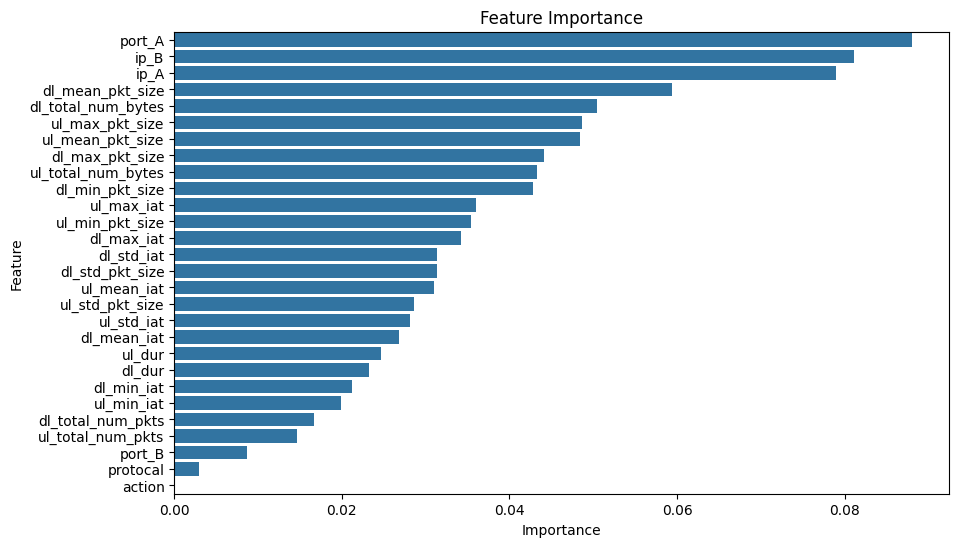

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have feature_importance_df from the previous code

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()